# Install libraries

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


# Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# load Data

In [5]:
df = pd.read_csv("/content/IRIS.csv")

# Data exploration

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
# df.head(3)
# df.tail(3)
print(df.sample(5))

     sepal_length  sepal_width  petal_length  petal_width          species
93            5.0          2.3           3.3          1.0  Iris-versicolor
3             4.6          3.1           1.5          0.2      Iris-setosa
120           6.9          3.2           5.7          2.3   Iris-virginica
131           7.9          3.8           6.4          2.0   Iris-virginica
63            6.1          2.9           4.7          1.4  Iris-versicolor


In [24]:
a = df.isnull().sum()
a[a>0]

,0


# data analysis

In [22]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
df.value_counts(df.species)

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


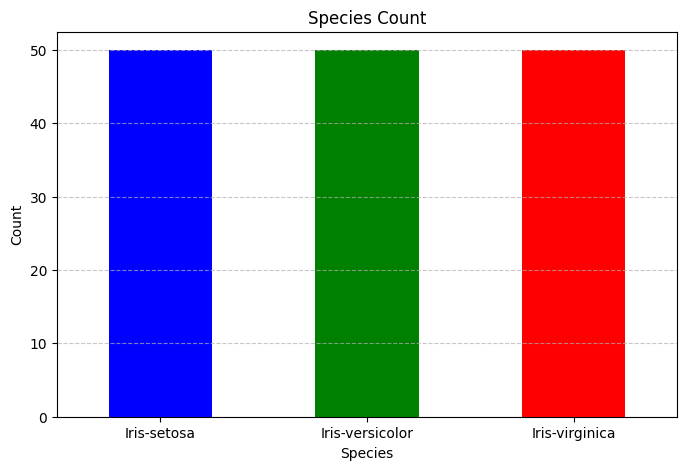

In [27]:
species_counts = df['species'].value_counts()

plt.figure(figsize=(8, 5))
species_counts.plot(kind='bar', color=['blue', 'green', 'red'])

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


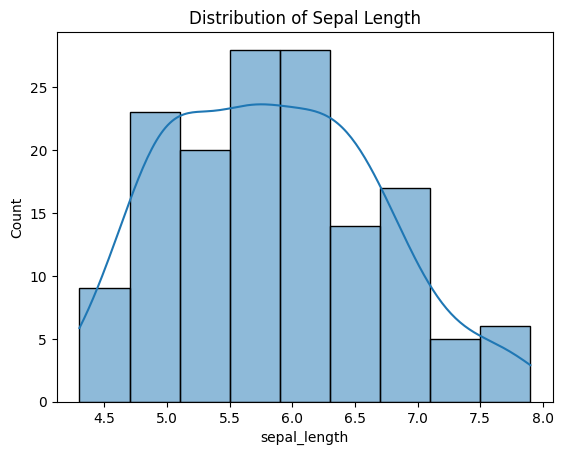

In [28]:
sns.histplot(data=df, x='sepal_length', kde=True)
plt.title('Distribution of Sepal Length')
plt.show()

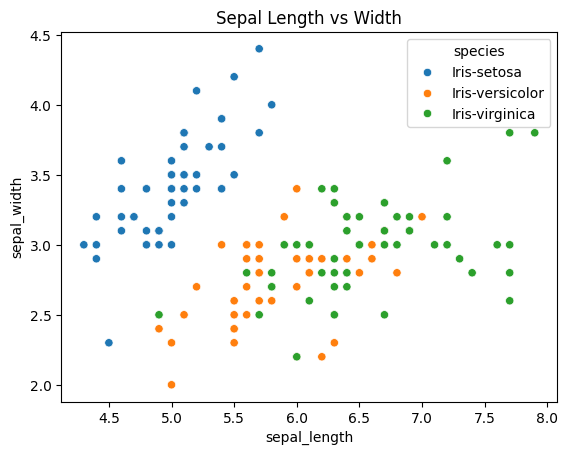

In [29]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Width')
plt.show()


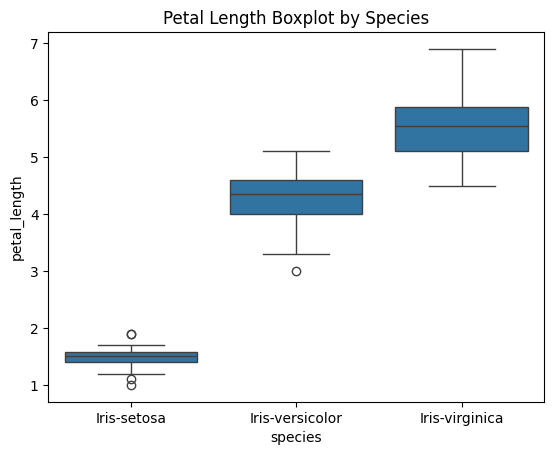

In [30]:
sns.boxplot(data=df, x='species', y='petal_length')
plt.title('Petal Length Boxplot by Species')
plt.show()

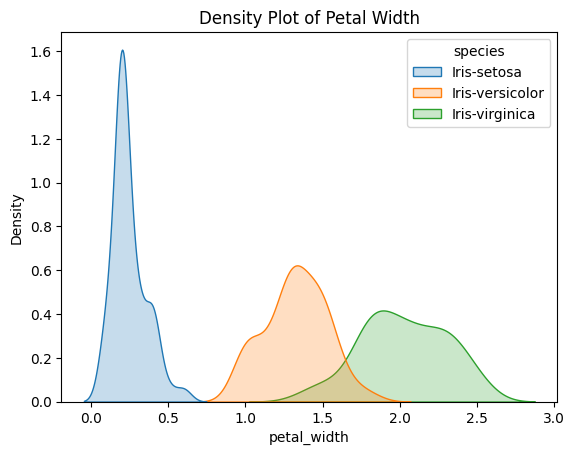

In [31]:
sns.kdeplot(data=df, x='petal_width', hue='species', fill=True)
plt.title('Density Plot of Petal Width')
plt.show()

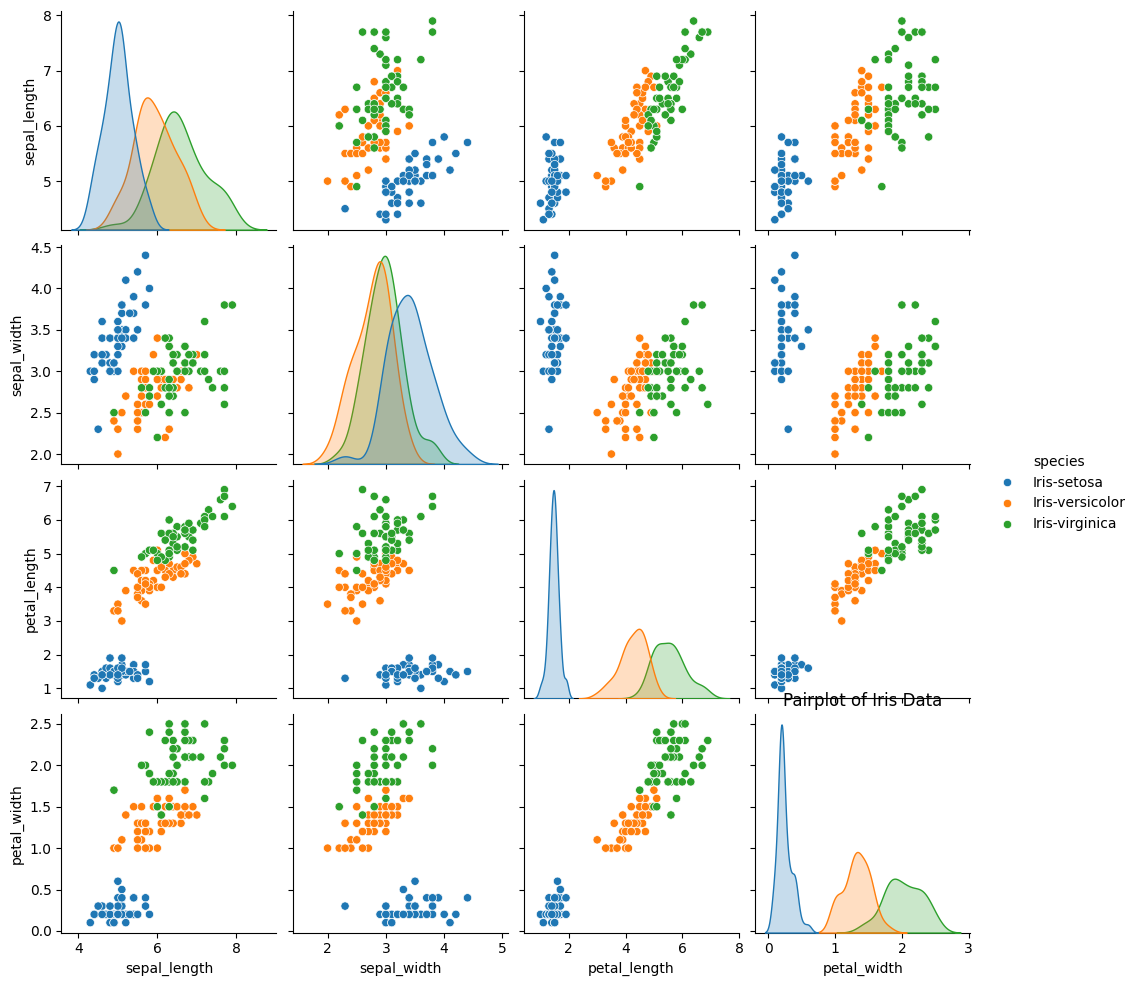

In [32]:
sns.pairplot(df, hue='species')
plt.title('Pairplot of Iris Data')
plt.show()


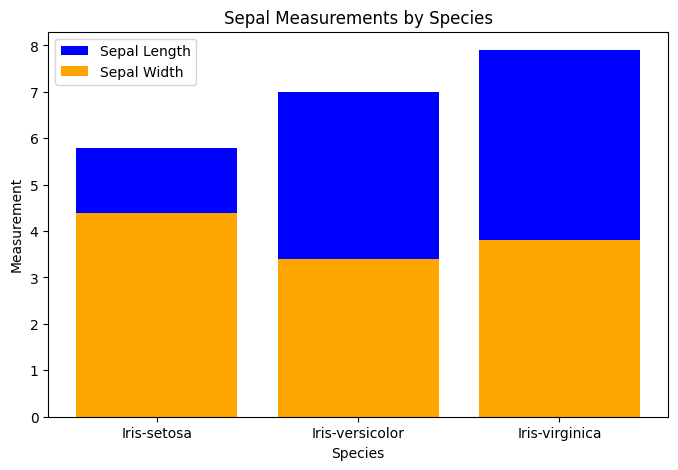

In [33]:
plt.figure(figsize=(8, 5))
plt.bar(df['species'], df['sepal_length'], color='blue', label='Sepal Length')
plt.bar(df['species'], df['sepal_width'], color='orange', label='Sepal Width')
plt.xlabel('Species')
plt.ylabel('Measurement')
plt.title('Sepal Measurements by Species')
plt.legend()
plt.show()

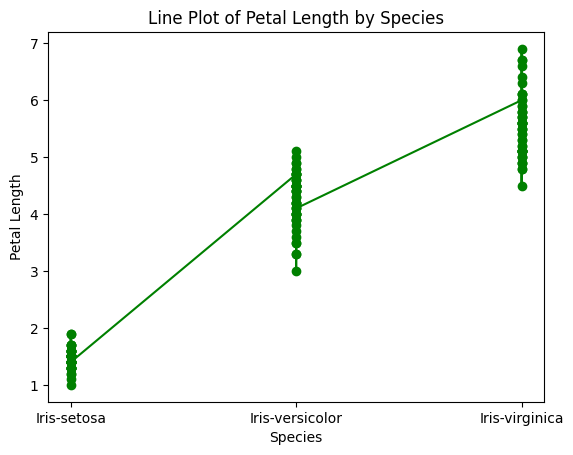

In [34]:
plt.plot(df['species'], df['petal_length'], marker='o', linestyle='-', color='green')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Line Plot of Petal Length by Species')
plt.show()

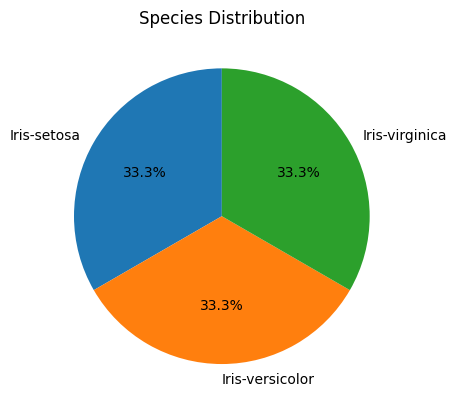

In [35]:
species_count = df['species'].value_counts()
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Distribution')
plt.show()

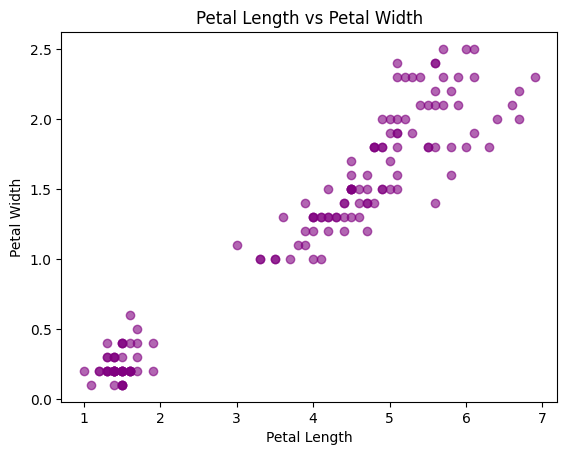

In [36]:
plt.scatter(df['petal_length'], df['petal_width'], color='purple', alpha=0.6)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()


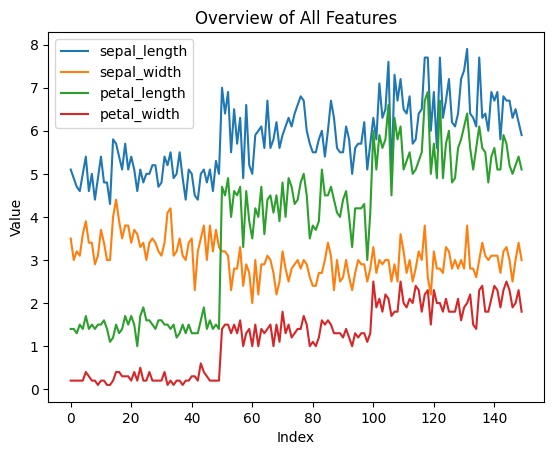

In [37]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in columns:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Overview of All Features')
plt.show()

# Preparing data for the model

In [40]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
label = LabelEncoder()
df['species'] = label.fit_transform(df['species'])

In [45]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7.7,3.0,6.1,2.3,2
140,6.7,3.1,5.6,2.4,2
126,6.2,2.8,4.8,1.8,2


In [47]:
df = df.drop_duplicates()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


In [49]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,1
101,5.8,2.7,5.1,1.9,2
18,5.7,3.8,1.7,0.3,0


In [50]:
x = df.drop("species",axis=1)
y = df.species

In [51]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.25,shuffle=True,
                                                  random_state=42)

# Create model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [53]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = GradientBoostingClassifier()

model5 = XGBClassifier()
model6 = CatBoostClassifier()
model7 = LGBMClassifier()

In [61]:
accuracies = []

def model(model):
    model.fit(xtrain,ytrain)
    predict = model.predict(xtest)
    accuracy = accuracy_score(predict,ytest)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

model(model1)
model(model2)
model(model3)
model(model4)

algorithms = ["LogisticRegression", "RandomForestClassifier", "DecisionTreeClassifier", "GradientBoostingClassifier"]
new = pd.DataFrame({"algorithms": algorithms, "accuracies": accuracies})
new

accuracy = 0.918918918918919
accuracy = 0.9459459459459459
accuracy = 0.972972972972973
accuracy = 0.9459459459459459


,algorithms,accuracies
0,LogisticRegression,0.918919
1,RandomForestClassifier,0.945946
2,DecisionTreeClassifier,0.972973
3,GradientBoostingClassifier,0.945946


In [62]:
model(model5)

accuracy = 0.918918918918919


In [63]:
model(model6)

Learning rate set to 0.070702
0:	learn: 1.0140598	total: 776us	remaining: 776ms
1:	learn: 0.9483606	total: 1.3ms	remaining: 650ms
2:	learn: 0.8878086	total: 1.77ms	remaining: 590ms
3:	learn: 0.8275700	total: 2.29ms	remaining: 572ms
4:	learn: 0.7736229	total: 2.72ms	remaining: 542ms
5:	learn: 0.7197777	total: 3.22ms	remaining: 534ms
6:	learn: 0.6807677	total: 3.74ms	remaining: 530ms
7:	learn: 0.6462336	total: 4.18ms	remaining: 518ms
8:	learn: 0.6117256	total: 4.63ms	remaining: 510ms
9:	learn: 0.5772649	total: 5.06ms	remaining: 501ms
10:	learn: 0.5452915	total: 5.53ms	remaining: 497ms
11:	learn: 0.5188068	total: 5.99ms	remaining: 493ms
12:	learn: 0.4906703	total: 6.2ms	remaining: 471ms
13:	learn: 0.4658255	total: 6.63ms	remaining: 467ms
14:	learn: 0.4481344	total: 7.05ms	remaining: 463ms
15:	learn: 0.4242576	total: 7.45ms	remaining: 458ms
16:	learn: 0.4026975	total: 7.85ms	remaining: 454ms
17:	learn: 0.3848973	total: 8.32ms	remaining: 454ms
18:	learn: 0.3682097	total: 8.54ms	remaining: 4

In [64]:
model(model7)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 4
[LightGBM] [Info] Start training from score -1.174120
[LightGBM] [Info] Start training from score -1.011601
[LightGBM] [Info] Start training from score -1.116961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [80]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
prex = model.predict(xtest)
accuracy_score(prex,ytest)

0.918918918918919

In [81]:
accuracy = accuracy_score(prex, ytest)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(ytest, prex)
print('Confusion Matrix:\n', conf_matrix)

report = classification_report(ytest, prex)
print('Classification Report:\n', report)


Accuracy: 0.918918918918919
Confusion Matrix:
 [[14  0  0]
 [ 0  9  1]
 [ 0  2 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.90      0.86        10
           2       0.92      0.85      0.88        13

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



[0.6727272727272727, 0.9727272727272728, 0.9818181818181818, 1.0, 1.0]
[0.6486486486486487, 0.8648648648648649, 0.972972972972973, 0.972972972972973, 0.972972972972973]


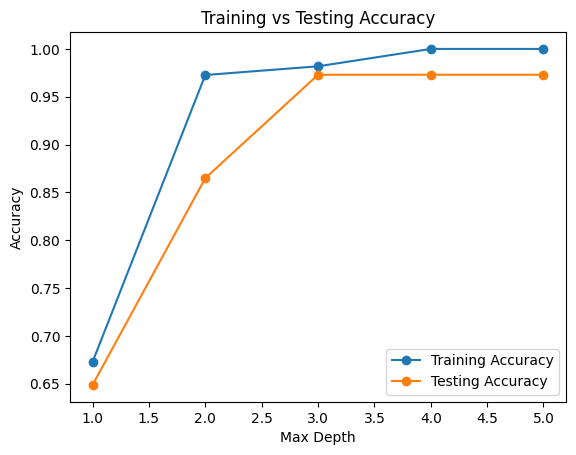

In [89]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
train_accuracy = []
test_accuracy = []

for i in range(1, 6):
    model.set_params(max_depth=i)
    model.fit(xtrain, ytrain)
    train_accuracy.append(accuracy_score(ytrain, model.predict(xtrain)))
    test_accuracy.append(accuracy_score(ytest, model.predict(xtest)))

print(train_accuracy)
print(test_accuracy)
plt.plot(range(1, 6), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, 6), test_accuracy, label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()

# The best model is:DecisionTreeClassifier This model overcomes the problem of overlearning.